## Influcence of Ridge Regression on outliers

This notebook shows the influence of rigde regression on all data points. Outliers have a strong impact on the fit.

In [1]:
from sklearn.linear_model import RidgeClassifier
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np
import sklearn 
from sklearn.preprocessing import LabelBinarizer
%matplotlib inline
from ipywidgets import *

In [2]:
def get_random_data(outlyer_pos=2):
    np.random.seed(42)
    y = np.concatenate((np.repeat(-1,20),np.repeat(1,20))) 
    X = np.random.rand(40,2) 
    X[:,0] += 0.75*y
    c, s = np.cos(-0.78), np.sin(-0.78)
    U = np.matrix([[c, -s], [s, c]])
    X_rot = np.matmul(X,U)
    X_rot[25,0] = outlyer_pos
    return X_rot,y

In [3]:
# Plots the data and predictions
# Code taken from: http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py
def plot_preds(clf, X, y, xmax=10):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x_max = xmax
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)    
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

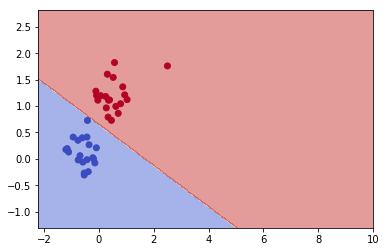

In [4]:
def plot_func(out):
    X,y = get_random_data(out)
    clf = RidgeClassifier(alpha=1) #For alpha=0 we get the same result as for linear regression
    #clf = svm.SVC(kernel='linear', C=1e5)
    clf.fit(X=X, y=y)
    plot_preds(clf, X, y)


interact(plot_func, out=FloatSlider(value=1, min=-2, max=10, step=0.5))
# 
#interact(plot_func, out=FloatSlider(value=1, min=-2, max=10, step=0.5),
#         alpha=FloatSlider(value=1, min=0, max=100, step=0.5))